In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

## Pregunta 1

La siguiente EDO autónoma 
$$ y' -e^{-2y}-y+2 = 0 $$
posee dos puntos de equilibrio. 


Recuerdo: Dada una EDO autónoma $y'=f(y)$, si $f(y_0) = 0$ se dice que el valor $y_0$ es un punto de equilibrio.

a) Utilizando el Teorema de Bolzano, determine un intervalo adecuado que asegure la existencia del punto de equilibrio para cada punto.
## Solución:

In [4]:
def f(y): return np.exp(-2*y)+y-2
f(1)
f(100)
print("[",f(1),f(100),"]")
print("f(1)*f(100) =",f(1)*f(100)) 
# Aplicando Teorema de Bolzano, se selecciona el intervalo [1,100]
# Dado que:
# f(1) * f(100) < 0
# por lo que se puede asegurar la existencia 
# de una solución en dicho intervalo

[ -0.8646647167633872 98.0 ]
f(1)*f(100) = -84.73714224281194


b) Utilice el método de la bisección para determinar una aproximación de los puntos de equilibrio. Para ello utilice una tolerancia igual a $10^{-10}$.

## Solución:

In [52]:
tol = 10**-10
def bisec(a,b,f,tol):
    xi = (a + b) / 2
    tynxt = 0
    while(abs(tynxt-xi)>=tol):
        if(f(a)*f(xi) < 0):
            b = xi
        elif(f(a)*f(xi) > 0):
            a = xi 
        if(f(a)*f(xi) != 0):
            tynxt = xi
            xi = (a + b) / 2
        else:
            tynxt = xi
    return xi
bisec(1,100,f,tol)

1.980973983828335

## Pregunta 2

Considere la ecuación diferencial
$$  y^{(4)} - \alpha^2 y'' = t^2 + h(t) $$
donde $h$ es la función continua por partes definida por
$$ h(t) = 
\left\lbrace
\begin{matrix}
0 & \textrm{si} & 0 < t \leq 3 \\
\alpha t^2 & \textrm{si} & 3 < t \leq 4 \\
 \alpha & \textrm{si} &  t \geq 4 
\end{matrix}
\right.$$

a) Defina variables reales $t$ y $s$ y la constante real positiva $ \alpha $.
## Solución:

In [ ]:
t,s = sp.symbols('t,s',real=True)
a = sp.Symbol('alpha',real=True,positive=True)

b) Reescriba $h$ en términos de la función de Heaviside (o de salto o salto unitario)
## Solución:

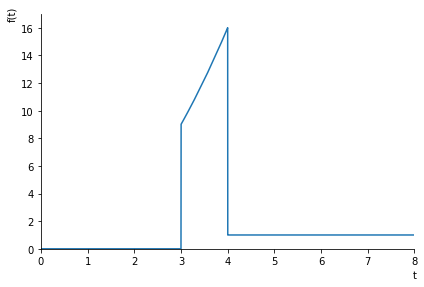

In [103]:
a = 1 # Para este ejercicio de asume a = 1 para poder modelar la función de Heaviside
h = (a*t**2)*sp.Heaviside(t-3)-((a*t**2)-a)*sp.Heaviside(t-4)
sp.plot(h,xlim=(0,8),ylim=(0,17)) # Graficando para verificar

c) Resuelva la EDO con las condiciones iniciales $y(0)=y'(0)=1, y''(0)=y'''(0) =0$
## Solución:

In [98]:
# Se calcula la trasnformada de la función de Heaviside
transfHev = sp.laplace_transform(h,t,s,noconds=True)
transfHev

(-15*s**2 - 8*s + (9*s**2 + 6*s + 2)*exp(s) - 2)*exp(-4*s)/s**3

In [101]:
Ly = (transfHev + s**3 + s**2 - s - 1 + 2/s**3) /(s**4-s**2) # Se despeja L[y]
Ly

(s**3 + s**2 - s - 1 + (-15*s**2 - 8*s + (9*s**2 + 6*s + 2)*exp(s) - 2)*exp(-4*s)/s**3 + 2/s**3)/(s**4 - s**2)

In [102]:
y = sp.inverse_laplace_transform(Ly,s,t,noconds=True) # Transformada inversa para obtener y
y

((t**4*exp(4 - t) + 6*t**2*exp(4 - t) - 208*t*exp(4 - t) + 684*exp(4 - t) - 54*exp(8 - 2*t) - 150)*Heaviside(t - 4) - (t**4*exp(4 - t) + 12*t**2*exp(4 - t) - 108*t*exp(4 - t) + 267*exp(4 - t) - 30*exp(7 - 2*t) - 102*E)*Heaviside(t - 3) - (t**4*exp(4 - t) + 12*t**2*exp(4 - t) - 12*t*exp(4 - t) - 12*exp(4 - 2*t) + 12*exp(4 - t) - 12*exp(4))*Heaviside(t))*exp(t - 4)/12

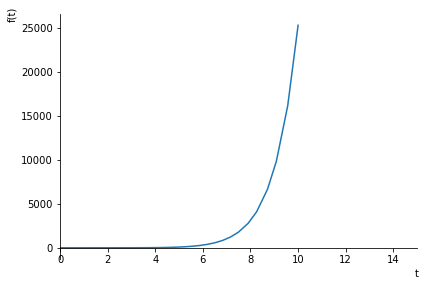

In [104]:
sp.plot(y, xlim=(0,15))